# Lab 7 - Wyatt Madden & Dan Crowley

In [1]:
import scipy.io as scipy_io
from scipy import sparse 
import numpy as np
import quadprog
import math
import cvxopt
import matplotlib.pyplot as plt

from cvxopt import matrix, solvers 
from sklearn.svm import SVC

In [2]:
mat = scipy_io.loadmat('cbcl1.mat')

In [3]:
    
def softsvm(X, l, gamma):
    D,N = X.shape

    x = np.repeat(1, N + D + 1) #should it be 1? i honestly dont know
    G = np.identity(n=N+D+1) * np.concatenate((np.repeat(0.00001, N), np.repeat(1, D), np.repeat(0.00001,1)), axis = 0)
    
    P = np.identity(n=N+D+1) * np.concatenate((np.repeat(0, N), np.repeat(1, D), np.repeat(0,1)), axis = 0)
    q = np.concatenate((np.repeat(gamma, N), np.repeat(0, D + 1)))
    
    I_n = -1*np.identity(N)
    LdotX = -1*np.dot(np.identity(N) * l, np.transpose(X))
    lil_l = -1*l
    
    #now create the bottom part of "G", the infinity section
    
    G_bottom = -1*np.identity(n=N+D+1)
    G = np.concatenate((I_n, np.transpose(LdotX), np.transpose(lil_l)))
    #G =np.concatenate((-1*np.identity(N), np.transpose(np.dot(np.identity(N) * l, np.transpose(X))), np.transpose(-1*l)))
    G= np.transpose(G)
    
    Gstack = np.concatenate((G, G_bottom))
    h = np.concatenate((np.repeat(-1, G.shape[0]), np.zeros(N,), 100000*np.ones(D+1)))
     
    A = np.identity(n = N + D + 1)
    b= np.repeat(1, N + D +1)
    
    P = matrix(P.astype('float'))
    q = matrix(q.astype('float'))
    Gstack = matrix(Gstack.astype('float'))
    h = matrix(h.astype('float'))
    A = matrix(A.astype('float'))
    b = matrix(b.astype('float'))

    sol = cvxopt.solvers.qp(P,q,Gstack, h)
    #http://cvxopt.org/userguide/coneprog.html#quadratic-programming
    #quadprog.solve_qp()
        #min 1/2 (x.T P X + q.T x)
        #st G x <= h
        #st A x =  b
    
    #sol = quadprog.solve_qp(G, a, c, b, meq)

# distribute components of x into w, b, and xi:

    xi = np.array(sol['x'][0:(N)])
    w = np.array(sol['x'][N:(N + D)])
    b = np.array(sol['x'][N + D])
    
    return(w, b, xi)




In [4]:
X = mat["X"]
l = mat["L"]
dims = mat["dims"]
temp = softsvm(X, l, 0.005)

w = temp[0]
b = temp[1]
xi = temp[2]

     pcost       dcost       gap    pres   dres
 0:  1.8727e+05 -8.4110e+09  4e+11  2e-02  1e+09
 1:  1.9626e+05 -4.2141e+09  4e+09  2e-04  1e+07
 2:  1.4407e+05 -1.0366e+08  1e+08  5e-06  3e+05
 3:  4.0404e+04 -8.0265e+06  8e+06  4e-07  2e+04
 4:  1.6922e+04 -1.6638e+06  2e+06  6e-08  4e+03
 5:  1.2669e+04 -2.0606e+05  2e+05  8e-09  5e+02
 6:  1.1209e+04 -9.8884e+03  2e+04  4e-10  2e+01
 7:  2.1797e+03 -1.3819e+02  2e+03  8e-13  6e-02
 8:  5.3370e+02 -4.0381e+01  6e+02  1e-13  9e-03
 9:  3.8516e+02 -2.5981e+01  4e+02  7e-14  5e-03
10:  8.0327e+01 -4.6118e+00  8e+01  1e-14  9e-04
11:  3.5905e+01  2.0033e+00  3e+01  4e-15  2e-04
12:  1.8969e+01  4.8980e+00  1e+01  1e-15  8e-05
13:  1.5663e+01  5.8390e+00  1e+01  7e-16  5e-05
14:  1.2604e+01  6.7196e+00  6e+00  4e-16  3e-05
15:  1.1518e+01  7.1137e+00  4e+00  3e-16  2e-05
16:  1.0206e+01  7.6109e+00  3e+00  2e-16  9e-06
17:  9.5774e+00  7.8854e+00  2e+00  2e-16  5e-06
18:  9.1323e+00  8.0907e+00  1e+00  2e-16  3e-06
19:  8.9003e+00  8.20

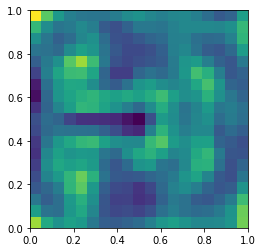

In [5]:
dat_2 = np.reshape(w, [dims[0][0], dims[0][1]])
plt.imshow(dat_2, extent=[0, 1, 0, 1])

# 3

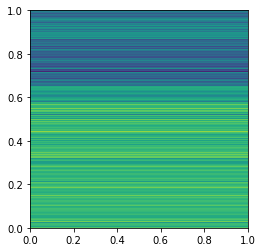

In [6]:
dat_3 = np.dot(np.transpose(X), w) + b
plt.imshow(dat_3, extent=[0, 1, 0, 1])

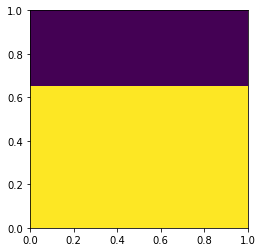

In [7]:
plt.imshow(l, extent=[0, 1, 0, 1])

# 4

# 5

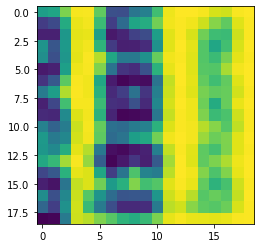

In [9]:
max_image = np.transpose(X)[np.argmax(dat_3), ]


fig = plt.imshow(np.reshape(max_image, [dims[0][0], dims[0][1]]))

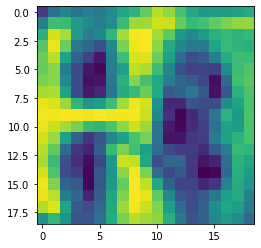

In [11]:
min_image = np.transpose(X)[np.argmin(dat_3), ]
fig = plt.imshow(np.reshape(min_image, [dims[0][0], dims[0][1]]))

Text(0, 0.5, 'Slack Variable')

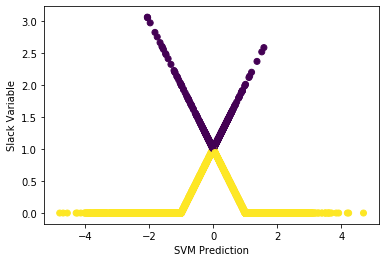

In [15]:
pred = np.dot(np.transpose(X), w) + b
np.sign(l) == np.sign(pred)
xi.shape
pred.shape
plt.scatter(y = xi, x = pred, c = np.sign(l) == np.sign(pred))
plt.xlabel("SVM Prediction")
plt.ylabel("Slack Variable")


 The slack variables for the correct predictions, in yellow, are 0 until the predictions start to approach 0. Once they meet and start moving away from 0 again the color changes to purple, these predictions were not correct. 

# 6

In [21]:
news = scipy_io.loadmat('news.mat')

X = news["X"]
l = news["L"]
dict = news["dict"]

temp = softsvm(X, l, 0.005)

w = temp[0]
b = temp[1]
xi = temp[2]

     pcost       dcost       gap    pres   dres
 0:  8.8305e+12 -6.7989e+13  2e+14  7e-01  1e+09


KeyboardInterrupt: 

In [24]:
w

array([[ 6.49887799e-17],
       [-7.87682828e-11],
       [-8.02248747e-11],
       ...,
       [ 9.99037136e-11],
       [ 1.00416795e-10],
       [ 5.93921369e-03]])

In [26]:
dict = news["dict"]
dict

array(['marc                                                                           ',
       'vanheyningen                                                                   ',
       'mvanheyn                                                                       ',
       ...,
       'lehigh                                                                         ',
       'wellesley                                                                      ',
       'swarthmore                                                                     '],
      dtype='<U79')

In [43]:
pred = np.dot(np.transpose(X), w) + b


In [66]:
w.argsort()[-3:][::-1]#ind[np.argsort(w[ind])]
np.argmax(w)
#dict[array]

array([1.56201565e-11])

In [133]:
dict[np.argmax(w)]

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [130]:
dict[np.argsort((np.dot((X[np.argmax(w),:]), np.transpose(X))))][9640:9656]

dict[np.argsort((np.dot((X[np.argmax(w),:]), np.transpose(X))))][0:10]

#((X[np.argmax(w),])).shape
#np.dot(X.transpose(X[np.argmax(w),]), X)

array(['marc                                                                           ',
       'iq                                                                             ',
       'niels                                                                          ',
       'bohr                                                                           ',
       'mjr                                                                            ',
       'ranum                                                                          ',
       'internals                                                                      ',
       'a_rubin                                                                        ',
       'dsg4                                                                           ',
       'dse                                                                            '],
      dtype='<U79')

In [150]:
np.argwhere([dict== "space"])

#dict[(dict == "space")]
#np.where(np.any(e>15, axis=1))

dict[np.argsort((np.dot((X[30,:]), np.transpose(X))))][0:10]

dict[np.argsort((np.dot((X[9519,:]), np.transpose(X))))][0:10]


array(['marc                                                                           ',
       'exposed                                                                        ',
       'born                                                                           ',
       'ecs                                                                            ',
       'mot                                                                            ',
       '147                                                                            ',
       '59                                                                             ',
       'declare                                                                        ',
       'guvax                                                                          ',
       'summarizes                                                                     '],
      dtype='<U79')

Text(0, 0.5, 'Slack Variable')

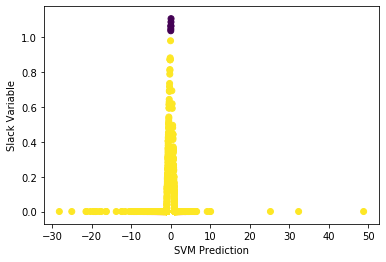

In [82]:
pred = np.dot(np.transpose(X), w) + b
np.sign(l) == np.sign(pred)
xi.shape
pred.shape
plt.scatter(y = xi, x = pred, c = np.sign(l) == np.sign(pred))
plt.xlabel("SVM Prediction")
plt.ylabel("Slack Variable")